In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing 

df = pd.read_parquet('data/df_log.parquet.gzip')
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376889 entries, 0 to 376888
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype                    
---  ------      --------------   -----                    
 0   ip          376889 non-null  string                   
 1   time        376889 non-null  datetime64[ns, UTC-03:00]
 2   request     376889 non-null  string                   
 3   status      376889 non-null  Int64                    
 4   size        376889 non-null  Int64                    
 5   referer     125383 non-null  string                   
 6   user_agent  376542 non-null  string                   
dtypes: Int64(2), datetime64[ns, UTC-03:00](1), string(4)
memory usage: 20.8 MB


In [2]:
df.head(5)

,ip,time,request,status,size,referer,user_agent
0,3.224.220.101,2022-03-31 00:00:13-03:00,GET /handle/10915/60216/browse?authority=http%...,200,7165,<NA>,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...
1,173.252.107.9,2022-03-31 00:00:13-03:00,GET /handle/10915/45833 HTTP/1.1,200,9539,<NA>,facebookexternalhit/1.1 (+http://www.facebook....
2,173.252.107.3,2022-03-31 00:00:13-03:00,GET /handle/10915/31292 HTTP/1.1,200,9512,<NA>,facebookexternalhit/1.1 (+http://www.facebook....
3,173.252.107.22,2022-03-31 00:00:14-03:00,GET /handle/10915/66507 HTTP/1.1,200,10170,<NA>,facebookexternalhit/1.1 (+http://www.facebook....
4,173.252.107.9,2022-03-31 00:00:14-03:00,GET /handle/10915/66507 HTTP/1.1,200,10170,<NA>,facebookexternalhit/1.1 (+http://www.facebook....


### Calculo si evento fue realizado por un bot conocido

In [7]:
import re

def counter_bots(entry):
    # regex obtenida a partir de https://github.com/atmire/COUNTER-Robots/blob/master/generated/COUNTER_Robots_list.txt
    return int(bool(re.search("(bot|^Buck\/[0-9]|spider|crawl|^.?$|[^a]fish|^IDA$|^ruby$|^@ozilla\/\d|^脝脝陆芒潞贸碌脛$|^破解后的$|AddThis|A6-Indexer|ADmantX|alexa|Alexandria(\s|\+)prototype(\s|\+)project|AllenTrack|almaden|appie|API[\+\s]scraper|Arachni|Arachmo|architext|ArchiveTeam|aria2\/\d|arks|^Array$|asterias|atomz|axios\/\d|BDFetch|Betsie|baidu|biglotron|BingPreview|binlar|bjaaland|Blackboard[\+\s]Safeassign|blaiz-bee|bloglines|blogpulse|boitho\.com-dc|bookmark-manager|Brutus\/AET|BUbiNG|bwh3_user_agent|CakePHP|celestial|cfnetwork|checklink|checkprivacy|China\sLocal\sBrowse\s2\.6|Citoid|cloakDetect|coccoc\/1\.0|Code\sSample\sWeb\sClient|ColdFusion|collection@infegy.com|com\.plumanalytics|combine|contentmatch|ContentSmartz|convera|core|Cortana|CoverScout|crusty\/\d|curl\/|cursor|custo|DataCha0s\/2\.0|daum(oa)?|^\%?default\%?$|DeuSu\/|Dispatch\/\d|Docoloc|docomo|Download\+Master|Drupal|DSurf|DTS Agent|EasyBib[\+\s]AutoCite[\+\s]|easydl|EBSCO\sEJS\sContent\sServer|EcoSearch|ELinks\/|EmailSiphon|EmailWolf|Embedly|EThOS\+\(British\+Library\)|facebookexternalhit\/|favorg|Faveeo\/\d|FDM(\s|\+)\d|Feedbin|feedburner|FeedFetcher|feedreader|ferret|Fetch(\s|\+)API(\s|\+)Request|findlinks|findthatfile|^FileDown$|^Filter$|^firefox$|^FOCA|Fulltext|Funnelback|Genieo|GetRight|geturl|GigablastOpenSource|G-i-g-a-b-o-t|GLMSLinkAnalysis|Goldfire(\s|\+)Server|google|Grammarly|GroupHigh\/\d|grub|gulliver|gvfs\/|harvest|heritrix|holmes|htdig|htmlparser|HeadlessChrome|HttpComponents\/1.1|HTTPFetcher|http.?client|httpget|httpx|httrack|ia_archiver|ichiro|iktomi|ilse|Indy Library|^integrity\/\d|internetseer|intute|iSiloX|iskanie|^java\/\d{1,2}.\d|jeeves|Jersey\/\d|jobo|Koha|kyluka|larbin|libcurl|libhttp|libwww|lilina|^LinkAnalyser|link.?check|LinkLint-checkonly|^LinkParser\/|^LinkSaver\/|linkscan|LinkTiger|linkwalker|lipperhey|livejournal\.com|LOCKSS|LongURL.API|ltx71|lwp|lycos[_+]|MaCoCu|mail\.ru|MarcEdit|mediapartners-google|megite|MetaURI[\+\s]API\/\d\.\d|Microsoft(\s|\+)URL(\s|\+)Control|Microsoft Office Existence Discovery|Microsoft Office Protocol Discovery|Microsoft-WebDAV-MiniRedir|mimas|mnogosearch|moget|motor|^Mozilla$|^Mozilla.4\.0$|^Mozilla\/4\.0\+\(compatible;\)$|^Mozilla\/4\.0\+\(compatible;\+ICS\)$|^Mozilla\/4\.5\+\[en]\+\(Win98;\+I\)$|^Mozilla.5\.0$|^Mozilla\/5.0\+\(compatible;\+MSIE\+6\.0;\+Windows\+NT\+5\.0\)$|^Mozilla\/5\.0\+like\+Gecko$|^Mozilla\/5.0(\s|\+)Gecko\/20100115(\s|\+)Firefox\/3.6$|^MSIE|MuscatFerre|myweb|nagios|^NetAnts\/\d|netcraft|netluchs|newspaper\/\d|ng\/2\.|^Ning\/\d|no_user_agent|nomad|nutch|^oaDOI$|ocelli|Offline(\s|\+)Navigator|OgScrper|okhttp|onetszukaj|^Opera\/4$|OurBrowser|panscient|parsijoo|^Pattern\/\d|Pcore-HTTP|pear\.php\.net|perman|PHP\/|pidcheck|pioneer|playmusic\.com|playstarmusic\.com|^Postgenomic(\s|\+)v2|powermarks|proximic|PycURL|python|Qwantify|rambler|ReactorNetty\/\d|Readpaper|redalert|Riddler|robozilla|rss|scan4mail|scientificcommons|scirus|scooter|Scrapy\/\d|ScoutJet|^scrutiny\/\d|SearchBloxIntra|shoutcast|Site24x7|SkypeUriPreview|slurp|sogou|speedy|sqlmap|SrceDAMP|Strider|summify|sunrise|Sysomos|T\-H\-U\-N\-D\-E\-R\-S\-T\-O\-N\-E|tailrank|Teleport(\s|\+)Pro|Teoma|The[\+\s]Knowledge[\+\s]AI|titan|^Traackr\.com$|Trello|Trove|Turnitin|twiceler|Typhoeus|ucsd|ultraseek|^undefined$|^unknown$|Unpaywall|URL2File|urlaliasbuilder|urllib|^user.?agent$|^User-Agent|validator|virus.detector|voila|^voltron$|voyager\/|w3af\.org|Wanadoo|Web(\s|\+)Downloader|WebCloner|webcollage|WebCopier|Webinator|weblayers|Webmetrics|webmirror|webmon|weborama-fetcher|webreaper|WebStripper|WebZIP|Wget|WhatsApp|wordpress|worm|www\.gnip\.com|WWW-Mechanize|xenu|y!j|yacy|yahoo|yandex|Yeti\/\d|Zabbix|ZoteroTranslationServer|zeus|zyborg|7siters)", entry, re.IGNORECASE)))

df['is_bot'] = df['user_agent'].apply(lambda x: counter_bots(str(x)))

In [34]:
df = df[['ip', 'request', 'size', 'is_bot']]
df['request'] = df['request'].apply(lambda x: len(x))
df.rename(columns={'request': 'request_lenght'}, inplace=True)
df

,ip,request_lenght,size,is_bot
0,3.224.220.101,112,7165,1
1,173.252.107.9,32,9539,1
2,173.252.107.3,32,9512,1
3,173.252.107.22,32,10170,1
4,173.252.107.9,32,10170,1
...,...,...,...,...
376884,181.230.136.160,133,1679,0
376885,190.36.19.241,81,88849,0
376886,144.76.14.40,216,8747,1
376887,52.70.240.171,235,7717,1


Agrupo por ip, en un nuevo dataframe llamado *df_groupby_ip* y le agrego un columna *count* con la cantidad de requests hechas 

In [35]:
df_groupby_ip = df.groupby(['ip'], as_index=False).size().rename(columns={'size':'count'})

Agrego a *df_groupby_ip* una columna con la cantidad de bytes descargados en un día

In [36]:
df_groupby_ip['size'] = df.groupby(['ip'], as_index=False)['size'].sum()['size']

Agrego la columna *request_lenght* a *df_groupby_ip*

In [38]:
df_groupby_ip['request_lenght'] = df['request_lenght']

Agrego a *df_groupby_ip* una columna *is_bot* si al menos uno de los *request* de una IP es reconocido como bot 

In [39]:
df_groupby_ip['is_bot'] = df.groupby(['ip'], as_index=False)['is_bot'].sum()['is_bot']
df_groupby_ip['is_bot'] = np.where(df_groupby_ip["is_bot"] > 0, 1, 0)

In [40]:
df_groupby_ip

,ip,count,size,request_lenght,is_bot
0,1.14.96.114,21,184774,112,1
1,1.145.209.230,1,8786,32,0
2,1.192.0.148,1,1579532,32,0
3,1.192.1.4,1,461240,32,0
4,1.231.29.243,7,70907,32,0
...,...,...,...,...,...
60006,99.179.18.55,1,3768662,211,0
60007,99.229.203.19,6,740181,77,0
60008,99.44.198.231,2,13285,230,0
60009,99.70.231.82,1,110833,151,0


### Graficando los datos en escala original


#### cantidad de request por IP

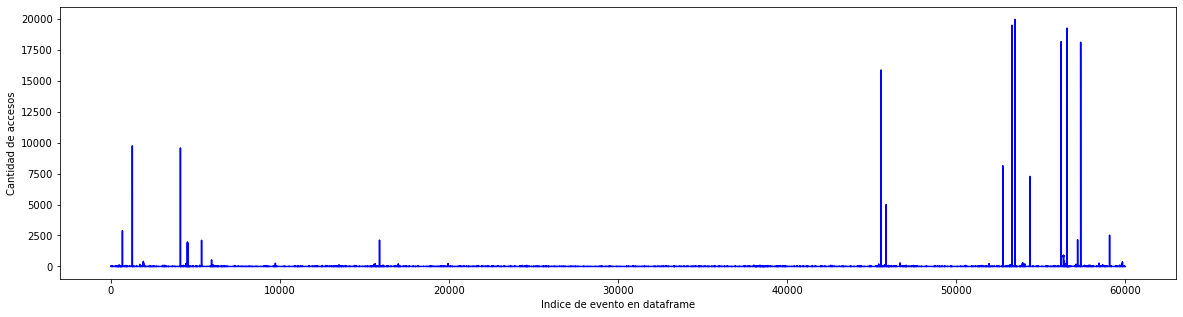

In [74]:
plt.figure(figsize=(20, 5))
plt.plot(df_groupby_ip["count"], color="blue", markersize=6)
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Cantidad de accesos")
plt.show()

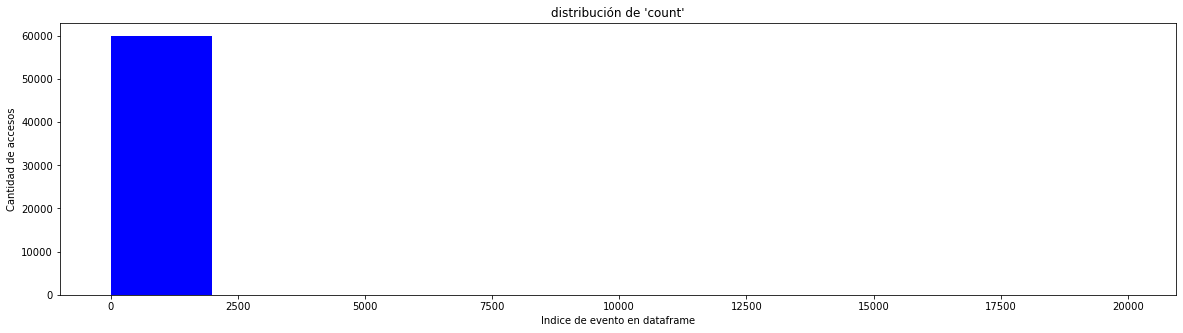

In [91]:
plt.figure(figsize=(20, 5))
plt.title("distribución de 'count'")
df_groupby_ip["count"].plot.hist(color="blue")
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Cantidad de accesos")
plt.show()

Bytes descargados

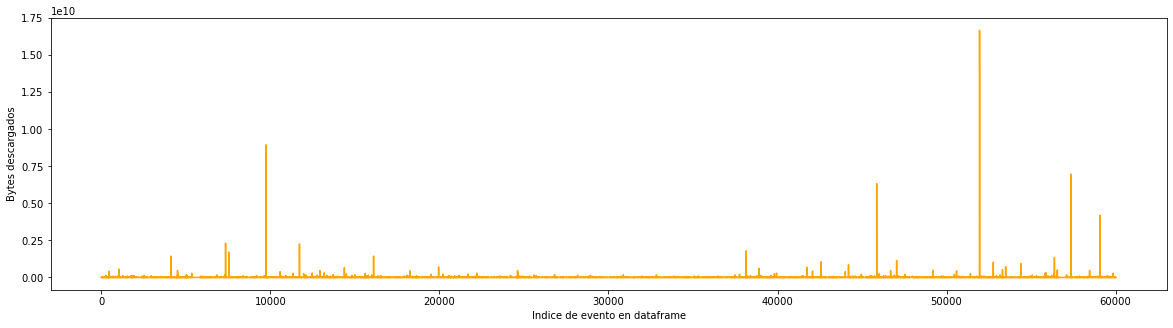

In [70]:
plt.figure(figsize=(20, 5))
plt.plot(df_groupby_ip["size"], color="orange", markersize=6)
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Bytes descargados")
plt.show()

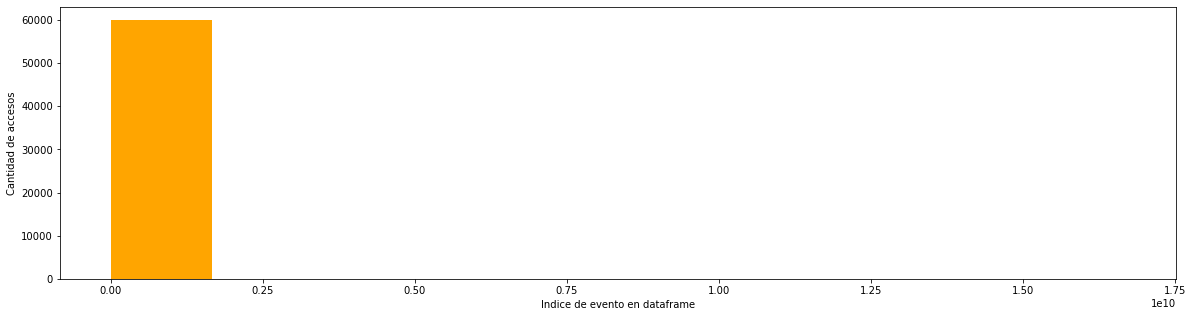

In [93]:
plt.figure(figsize=(20, 5))
df_groupby_ip["size"].plot.hist(color="orange")
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Cantidad de accesos")
plt.show()

Grafico para columna *bot*

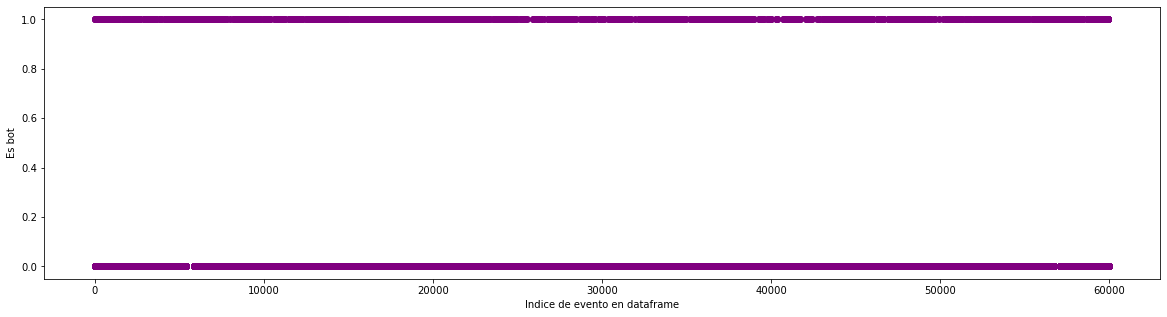

In [71]:
plt.figure(figsize=(20, 5))
plt.plot(df_groupby_ip["is_bot"], linewidth=0, marker="o", color="purple")
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Es bot")
plt.show()

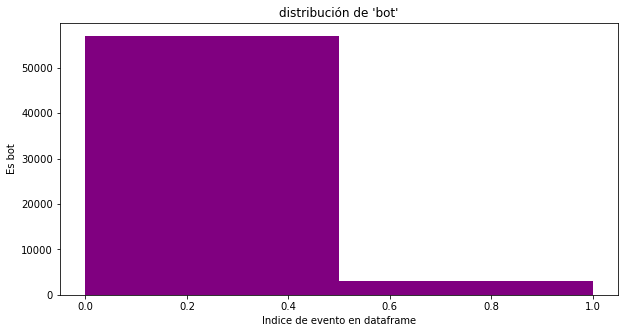

In [94]:
plt.figure(figsize=(10, 5))
plt.title("distribución de 'bot'")
df_groupby_ip["is_bot"].plot.hist(bins=2, color="purple")
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Es bot")
plt.show()

Grafico para columna *request_lenght*

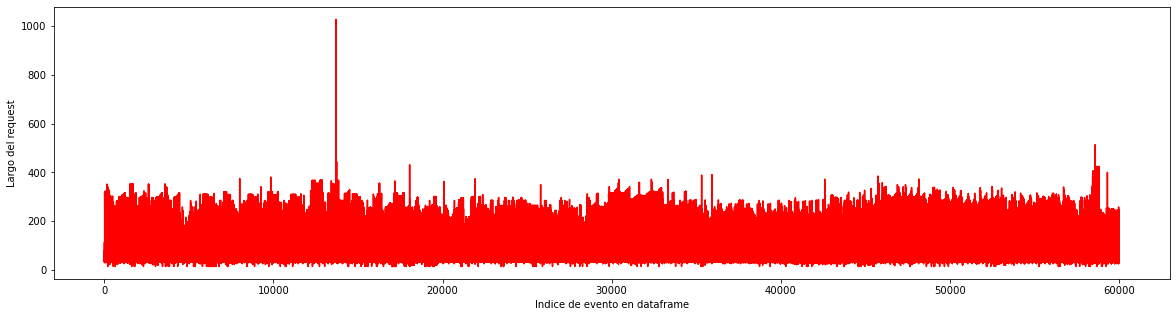

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(df_groupby_ip["request_lenght"], color="red", markersize=6)
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Largo del request")
plt.show()

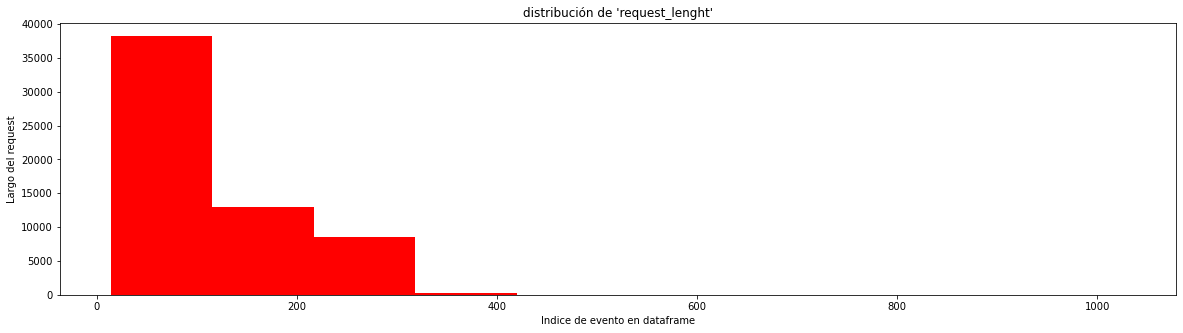

In [95]:
plt.figure(figsize=(20, 5))
plt.title("distribución de 'request_lenght'")
df_groupby_ip["request_lenght"].plot.hist(color="red")
plt.xlabel("Indice de evento en dataframe")
plt.ylabel("Largo del request")
plt.show()

Veo matríz de coorrelación entre las dimensiones

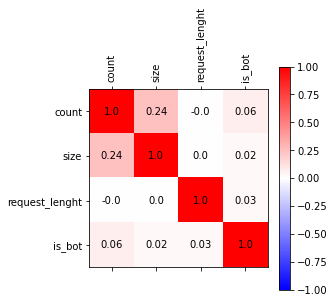

In [102]:
df_co = df_groupby_ip.iloc[:,1:]
matriz = df_co.corr() # -1 (existe una relación fuerte)  0   1 (existe relación fuerte)
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(4), df_co.columns, rotation=90)
plt.yticks(range(4), df_co.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")


plt.colorbar()
plt.show()

Quito *request_lenght* ya que solo se relaciona lo suficiente con ninguna otra dimensión

In [104]:
df_groupby_ip.drop('request_lenght', axis=1, inplace=True)
df_groupby_ip

,ip,count,size,is_bot
0,1.14.96.114,21,184774,1
1,1.145.209.230,1,8786,0
2,1.192.0.148,1,1579532,0
3,1.192.1.4,1,461240,0
4,1.231.29.243,7,70907,0
...,...,...,...,...
60006,99.179.18.55,1,3768662,0
60007,99.229.203.19,6,740181,0
60008,99.44.198.231,2,13285,0
60009,99.70.231.82,1,110833,0


In [105]:
df_groupby_ip.to_parquet('data/df_groupby_ip.parquet.gzip', compression='gzip', index=False)

### KMedias

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

In [ ]:
db_indexes = {}
for n in range(2,10):
    kmeans = KMeans(n).fit(df_robust_scaler.values)
    db_index = davies_bouldin_score(df_robust_scaler.values, kmeans.labels_)
    db_indexes.update({n: db_index})

In [ ]:
plt.plot(list(db_indexes.keys()), list(db_indexes.values()))
plt.xlabel("Número de clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [ ]:
n_clusters = 2
kmeans = KMeans(n_clusters).fit(df_robust_scaler.values)
df_groupby_ip["cluster"] = kmeans.labels_
df_robust_scaler["cluster"] = kmeans.labels_
df_robust_scaler

In [ ]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]
for cluster in range(kmeans.n_clusters):
    plt.scatter(df_groupby_ip[df_groupby_ip["cluster"] == cluster]["count"],
                df_groupby_ip[df_groupby_ip["cluster"] == cluster]["size"],
                marker="o", s=180, color=colores[cluster], alpha=0.5, label='cluster ' + str(cluster))
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster], label='centroide ' + str(cluster) )

plt.legend()

plt.title("Descargas en un día por IP", fontsize=20)
plt.xlabel("Cantidad de bytes descargados", fontsize=15)
plt.ylabel("Cantidad de requests", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.show()

A continuación se utilizará la técnica de [Arbol de clasificación](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart) para explicar que criterios se usaron para el clustering

In [ ]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    df_groupby_ip[["count", "size", "is_bot", "request_lenght"]],
    df_groupby_ip["cluster"], 
    test_size=0.30)


In [ ]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol, feature_names=["cantidad", "tamaño", "is_bot", 'request_lenght']))
plt.figure(figsize=(40, 20))
tree.plot_tree(arbol, feature_names=["cantidad", "tamaño", "is_bot", "request_lenght"])
plt.show()



### KMedias con 6

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters).fit(df_robust_scaler.values)
df_groupby_ip["cluster"] = kmeans.labels_
df_robust_scaler["cluster"] = kmeans.labels_

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]
for cluster in range(kmeans.n_clusters):
    plt.scatter(df_groupby_ip[df_groupby_ip["cluster"] == cluster]["count"],
                df_groupby_ip[df_groupby_ip["cluster"] == cluster]["size"],
                marker="o", s=180, color=colores[cluster], alpha=0.5, label='cluster ' + str(cluster))
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster], label='centroide ' + str(cluster) )

plt.legend()

plt.title("Descargas en un día por IP", fontsize=20)
plt.xlabel("Cantidad de bytes descargados", fontsize=15)
plt.ylabel("Cantidad de requests", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.show()

Árbol para explicar kmedias con 6 clusters

In [ ]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    df_groupby_ip[["count", "size", "is_bot", "request_lenght"]],
    df_groupby_ip["cluster"], 
    test_size=0.30)

from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol, feature_names=["cantidad", "tamaño", "is_bot", 'request_lenght']))
plt.figure(figsize=(40, 20))
tree.plot_tree(arbol, feature_names=["cantidad", "tamaño", "is_bot", "request_lenght"])
plt.show()



In [ ]:
df_groupby_ip[(df_groupby_ip["cluster"] != 1) & (df_groupby_ip["is_bot"] == 0)]